# EDA NUBI NLP / ML Engineering Challenge
# ======================================

In [7]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
tv = pd.read_csv("../TVs.csv")
cel = pd.read_csv("../Celulares.csv")

In [14]:
print(tv.describe(), tv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18196 entries, 0 to 18195
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        18196 non-null  int64 
 1   Encrypted_Seller  18196 non-null  object
 2   Encrypted_Id      18196 non-null  object
 3   Title             18196 non-null  object
 4   etiqueta          18196 non-null  object
dtypes: int64(1), object(4)
memory usage: 710.9+ KB
         Unnamed: 0
count  18196.000000
mean    9097.500000
std     5252.877085
min        0.000000
25%     4548.750000
50%     9097.500000
75%    13646.250000
max    18195.000000 None


In [15]:
print(cel.describe(), cel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81166 entries, 0 to 81165
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        81166 non-null  int64 
 1   Encrypted_Seller  81166 non-null  object
 2   Encrypted_Id      81166 non-null  object
 3   Title             81166 non-null  object
 4   etiqueta          81166 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB
         Unnamed: 0
count  81166.000000
mean   40582.500000
std    23430.750312
min        0.000000
25%    20291.250000
50%    40582.500000
75%    60873.750000
max    81165.000000 None


# Pandas Profile Report

In [10]:
profile_tv = ProfileReport(tv, title="TV Dataset Analysis", explorative=True)
profile_tv.to_file("tv-report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1384.26it/s]


In [8]:
profile_cel = ProfileReport(cel, title="Cel Dataset Analysis", explorative=True)
profile_cel.to_file("cel-report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 1365.33it/s]


# Datos de partida

In [3]:
tv['etiqueta'] = 'Televisión'
tv_title = tv['etiqueta']
tv_lengths = tv["Title"].str.len()

cel['etiqueta'] = 'Celular'
cel_title = cel['etiqueta']
cel_lengths = cel["Title"].str.len()

title_lenghts = pd.DataFrame({
    "product": tv_title.append(cel_title),
    "length": tv_lengths.append(cel_lengths)
})

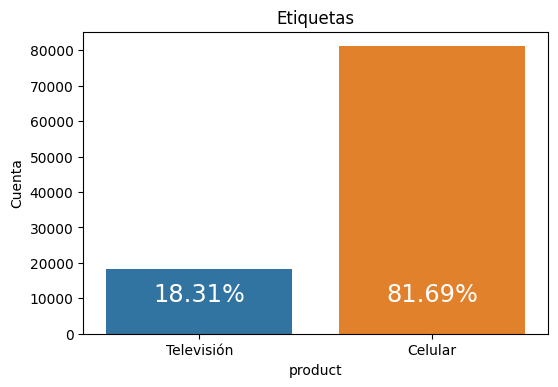

In [16]:
fig = plt.figure(dpi=100)
ax = fig.gca()
sns.countplot(x='product', data=title_lenghts, ax=ax)
ax.set_title("Etiquetas")
ax.set_xlabel("product")
ax.set_ylabel("Cuenta")

percentages = (title_lenghts["product"].value_counts() / len(title_lenghts)).to_dict()
xs = {label.get_text():idx for idx, label in enumerate(ax.get_xticklabels())}
for label, pct in percentages.items():
#    x = labels[label].get_x()
    ax.text(xs[label],9000, f"{pct:0.2%}", ha='center', fontsize="xx-large", c="white")
    pass

# Analizo la longitud de los textos

<AxesSubplot:xlabel='length', ylabel='product'>

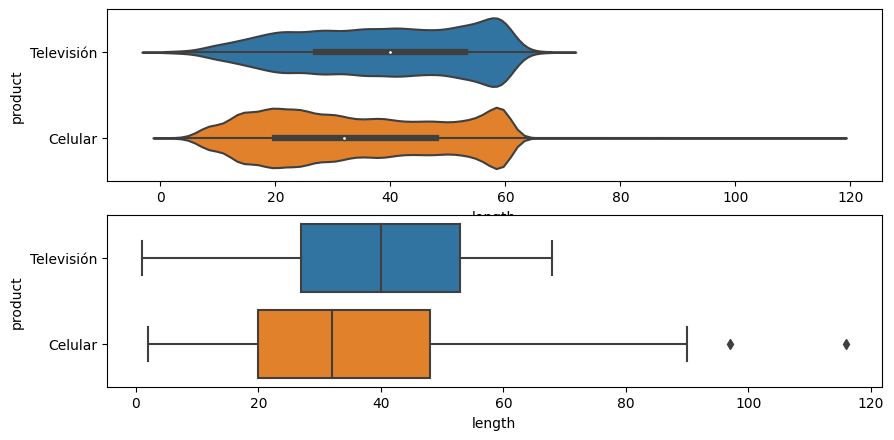

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=100, figsize=(10,5))

sns.violinplot(y="product" , x="length", data=title_lenghts, ax=ax1)
sns.boxplot(y="product" , x="length", data=title_lenghts, ax=ax2)

# Analizo datos procesados
* Reviso los resultados obtenidos en nuestro modelo de entidades nombradas

In [2]:
tv_ = pd.read_csv("../spacy_ner/TVs/tv_bd.csv")
cel_ = pd.read_csv("../spacy_ner/cel/cel_bd.csv")

## TV

In [8]:
# Libraries
from wordcloud import WordCloud

# Create a list of word
def cloud(text):
    unique_string=(" ").join(text)

    # Create the wordcloud object
    wordcloud = WordCloud(width=480, height=480, margin=0).generate(unique_string)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

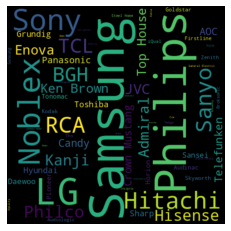

In [22]:
tv_marcas = tv_['marcas_corregidas'][tv_['marcas_corregidas'] != '##REV']
cloud(tv_marcas.to_list())

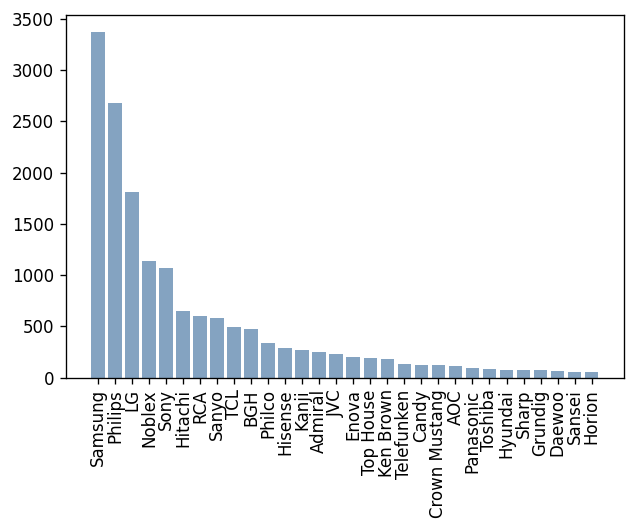

In [23]:
# create a dataset
height = tv_marcas.value_counts()[:30]
bars = height.index
x_pos = np.arange(len(bars))

fig = plt.figure(dpi=120)
ax = fig.gca()
# Create bars
plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))

# Create names on the x-axis
plt.xticks(x_pos, bars, rotation='vertical')
plt.show()

## Celulares

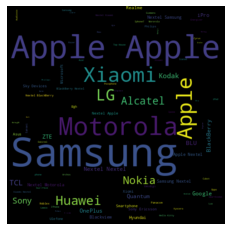

In [24]:
cel_marcas = cel_['marcas_corregidas'][cel_['marcas_corregidas'] != '##REV']
cloud(cel_marcas.to_list())

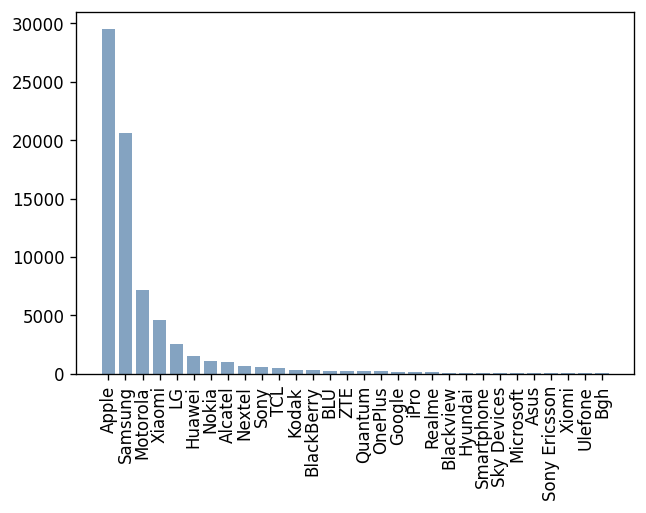

In [25]:
# create a dataset
height = cel_marcas.value_counts()[:30]
bars = height.index
x_pos = np.arange(len(bars))

fig = plt.figure(dpi=120)
ax = fig.gca()
# Create bars
plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))

# Create names on the x-axis
plt.xticks(x_pos, bars, rotation='vertical')
plt.show()

# Reporte interactivo
* https://datastudio.google.com/reporting/72957a32-1ecd-45aa-b642-44586bf67d52